<a href="https://colab.research.google.com/github/kamakshidasan/anice/blob/main/Robot_Bounded_In_Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question


<div><p>On an infinite plane, a robot initially stands at <code>(0, 0)</code> and faces north. Note that:</p>

<ul>
	<li>The <strong>north direction</strong> is the positive direction of the y-axis.</li>
	<li>The <strong>south direction</strong> is the negative direction of the y-axis.</li>
	<li>The <strong>east direction</strong> is the positive direction of the x-axis.</li>
	<li>The <strong>west direction</strong> is the negative direction of the x-axis.</li>
</ul>

<p>The robot can receive one of three instructions:</p>

<ul>
	<li><code>"G"</code>: go straight 1 unit.</li>
	<li><code>"L"</code>: turn 90 degrees to the left (i.e., anti-clockwise direction).</li>
	<li><code>"R"</code>: turn 90 degrees to the right (i.e., clockwise direction).</li>
</ul>

<p>The robot performs the <code>instructions</code> given in order, and repeats them forever.</p>

<p>Return <code>true</code> if and only if there exists a circle in the plane such that the robot never leaves the circle.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> instructions = "GGLLGG"
<strong>Output:</strong> true
<strong>Explanation:</strong> The robot is initially at (0, 0) facing the north direction.
"G": move one step. Position: (0, 1). Direction: North.
"G": move one step. Position: (0, 2). Direction: North.
"L": turn 90 degrees anti-clockwise. Position: (0, 2). Direction: West.
"L": turn 90 degrees anti-clockwise. Position: (0, 2). Direction: South.
"G": move one step. Position: (0, 1). Direction: South.
"G": move one step. Position: (0, 0). Direction: South.
Repeating the instructions, the robot goes into the cycle: (0, 0) --&gt; (0, 1) --&gt; (0, 2) --&gt; (0, 1) --&gt; (0, 0).
Based on that, we return true.
</pre>

<p><strong>Example 2:</strong></p>

<pre><strong>Input:</strong> instructions = "GG"
<strong>Output:</strong> false
<strong>Explanation:</strong> The robot is initially at (0, 0) facing the north direction.
"G": move one step. Position: (0, 1). Direction: North.
"G": move one step. Position: (0, 2). Direction: North.
Repeating the instructions, keeps advancing in the north direction and does not go into cycles.
Based on that, we return false.
</pre>

<p><strong>Example 3:</strong></p>

<pre><strong>Input:</strong> instructions = "GL"
<strong>Output:</strong> true
<strong>Explanation:</strong> The robot is initially at (0, 0) facing the north direction.
"G": move one step. Position: (0, 1). Direction: North.
"L": turn 90 degrees anti-clockwise. Position: (0, 1). Direction: West.
"G": move one step. Position: (-1, 1). Direction: West.
"L": turn 90 degrees anti-clockwise. Position: (-1, 1). Direction: South.
"G": move one step. Position: (-1, 0). Direction: South.
"L": turn 90 degrees anti-clockwise. Position: (-1, 0). Direction: East.
"G": move one step. Position: (0, 0). Direction: East.
"L": turn 90 degrees anti-clockwise. Position: (0, 0). Direction: North.
Repeating the instructions, the robot goes into the cycle: (0, 0) --&gt; (0, 1) --&gt; (-1, 1) --&gt; (-1, 0) --&gt; (0, 0).
Based on that, we return true.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= instructions.length &lt;= 100</code></li>
	<li><code>instructions[i]</code> is <code>'G'</code>, <code>'L'</code> or, <code>'R'</code>.</li>
</ul>
</div>

# Solution

**The only way to do this problem: is if you know the solution before hand**

Think of a robot that will go in a square, that starts facing north from origin

The robot now goes like this:

- go straight (0, 1)

- turn left (west)
- go straight (-1, 1)

- turn left (south)
- go straight (-1, 0)

- turn left (east)
- go straight (0, 0)

Any robot that comes back to the origin like this (no matter what direction it faces in the end), will definitely be in a circle
---

Suppose the robot goes in some other direction

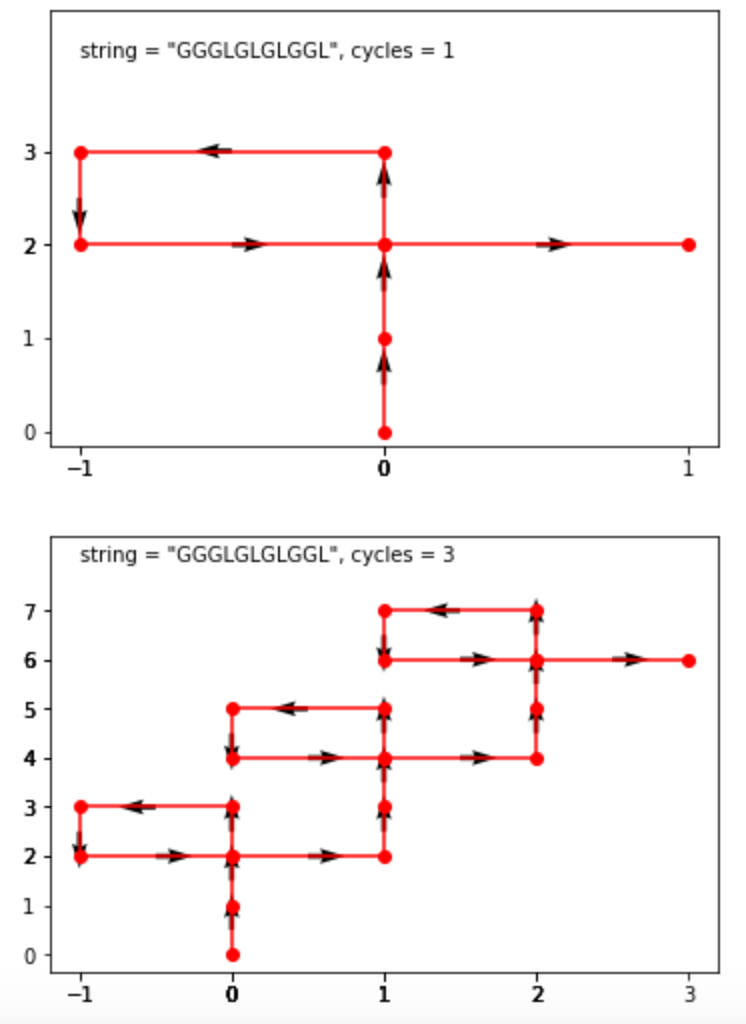

Then look which direction it is facing at the end - if it is any other direction that north, it will converge. 

The explanation at this link is brilliant: https://math.stackexchange.com/questions/3287431/robot-bounded-in-a-circle-problem

---

If the instruction sequence leaves the robot some distance from the origin, say at (x,y), and still facing the same way, then repeating the instructions will subsequently put it at (2x,2y), (3x,3y), (4x,4y), ... and so on. The distance to the origin will grow indefinitely, so it will exceed the radius of any circle you try to bound it in.

Suppose the instruction sequence leaves the robot at (x,y) but also turns it a quarter turn to the right. When it repeats the instructions three more times, it will essentially travel clockwise in a square. Although each side of the "square" will be a wiggly path, the end points of the four sequences form a square with the coordinates (x,y), (x+y,y-x), (y,-x), and (0,0). Further repetitions simply repeat that square. The distance to the origin is bounded by the number of steps the robot takes while doing that sequence four times, so the whole path can be bounded by a circle of that radius.

Suppose the instruction sequence leaves the robot at (x,y) but also turns it a quarter turn to the left. This is the same as the above, except that the robot goes anti-clockwise around the "square".

Suppose the instruction sequence leaves the robot at (x,y) but also turns it a half turn. In this case the next repetition already returns it to where it started. Again this is bounded, this time by the number of steps done in just two repetitions of the sequence.

The only remaining case is where the instruction sequence leaves the robot at the origin and still facing north. Now it is back to where it started after doing the sequence once, so the whole path is bounded by the number of steps in that single sequence.

To recap:

It is unbounded if the sequence leaves it away from the origin and still facing the same direction.
It is bounded in all other cases.

# Coding

- Just follow the sequence and follow instructions for one single round

In [ ]:
class Solution(object):
    def isRobotBounded(self, instructions):
        
        direction = "north"
        x = 0
        y = 0
        
        for instruction in instructions:
            if instruction == "G":
                if direction == "north":
                    y += 1
                elif direction == "south":
                    y -= 1
                elif direction == "east":
                    x += 1
                elif direction == "west":
                    x -= 1
                    
            elif instruction == "L":
                if direction == "north":
                    direction = "west"
                elif direction == "south":
                    direction = "east"
                elif direction == "east":
                    direction = "north"
                elif direction == "west":
                    direction = "south"
            
            elif instruction == "R":
                if direction == "north":
                    direction = "east"
                elif direction == "south":
                    direction = "west"
                elif direction == "east":
                    direction = "south"
                elif direction == "west":
                    direction = "north"
        
        return (x == 0 and y == 0) or direction != "north"

---

In case you don't want to use these hardcoded values

You will have to cycle upon the same array

# Question

But, How do you loop over the same array infinitely each time?!

# Answer

By using the mod operator!

In [ ]:
class Solution(object):
    def isRobotBounded(self, instructions):
        
        x = 0
        y = 0
        
        delta_x = [0, -1, 0, 1]
        delta_y = [1, 0, -1, 0]
        index = 0
        
        for instruction in instructions:
            if instruction == "G":
                x += delta_x[index]
                y += delta_y[index]
                    
            elif instruction == "L":
                index = (index + 1) % 4
            
            elif instruction == "R":
                index = (index - 1) % 4
        
        return (x == 0 and y == 0) or index != 0